In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model

DIR = "/media/rifat/STUDY/4-1/LAB/Image_Processing/image/paddy.jpeg"
import warnings
warnings.filterwarnings('ignore')

2022-09-09 12:35:55.322832: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [7]:
def main(x):


    img = prepare_data()
    baseModel = VGG16()
    layer_number = x
    inputs = baseModel.input
    outputs = baseModel.layers[layer_number].output
    model = Model(inputs, outputs)
    outputs = model.predict(img)
    display_channels(outputs, layer_number)

In [8]:
	
def display_channels(chSet, layer_no):	
	plt.figure(figsize = (20, 20))
	plt.suptitle('Layer-' + str(layer_no))
	for i in range(3):
		plt.subplot(3, 3, i + 1)
		plt.title('Channel-' + str(i))
		plt.imshow(chSet[0, :, :, i], cmap = 'gray')
		plt.axis('off')
	plt.show()
	plt.close()

In [9]:
	
def prepare_data():

	imgPath = DIR 
	bgrImg = cv2.imread(imgPath)
	print(bgrImg.shape)

	rgbImg = cv2.cvtColor(bgrImg, cv2.COLOR_BGR2RGB)    
	rgbImg = cv2.resize(rgbImg, (224, 224))

    
	print(rgbImg.shape)
	rgbImg = np.expand_dims(rgbImg, axis = 0)
	print(rgbImg.shape)
	
	# Preprocess image
	rgbImg = preprocess_input(rgbImg)
	
	return rgbImg

(751, 1000, 3)
(224, 224, 3)
(1, 224, 224, 3)


2022-09-09 12:49:32.976829: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 411041792 exceeds 10% of free system memory.


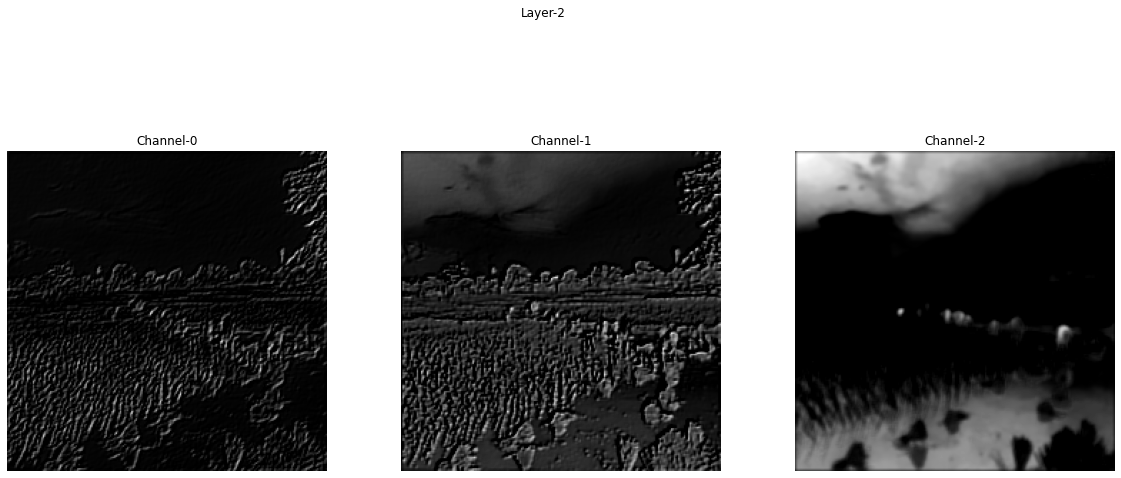

In [10]:
if __name__ == '__main__':
    main(2)

# we can see in layer 2 filter is used 2 times. CNN extract some data but images are still Human undrstable

(751, 1000, 3)
(224, 224, 3)
(1, 224, 224, 3)


2022-09-09 12:49:35.371577: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 411041792 exceeds 10% of free system memory.
2022-09-09 12:49:36.430023: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


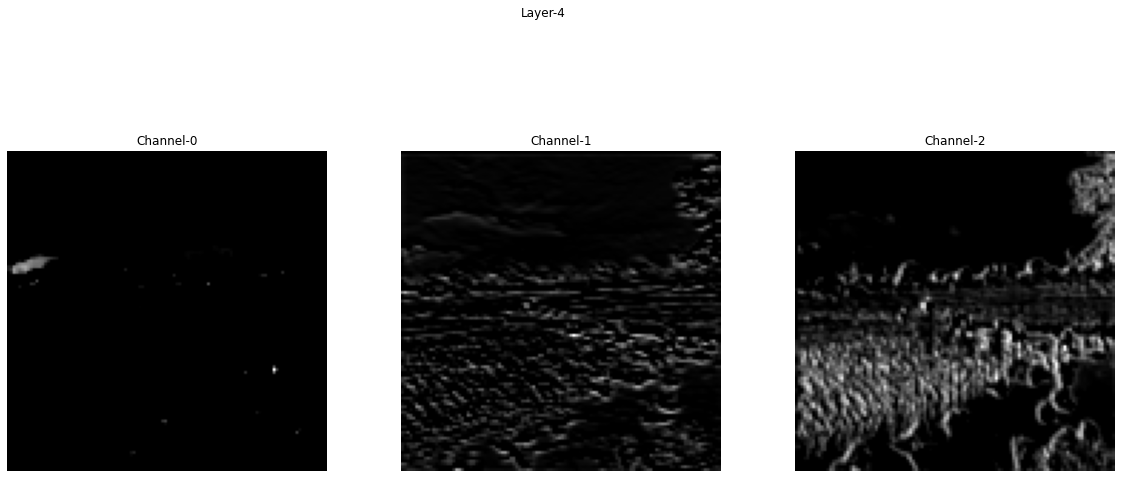

In [11]:
main(4)

## IN layes 4 in our image 4 times filters are used. After uses of filters few images are understandable by us and rest of them are only understandable by computer only
## in layer 4 images shape is reduced. image information is reduced alos.

(751, 1000, 3)
(224, 224, 3)
(1, 224, 224, 3)


2022-09-09 12:49:50.681435: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 411041792 exceeds 10% of free system memory.
2022-09-09 12:49:52.810789: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


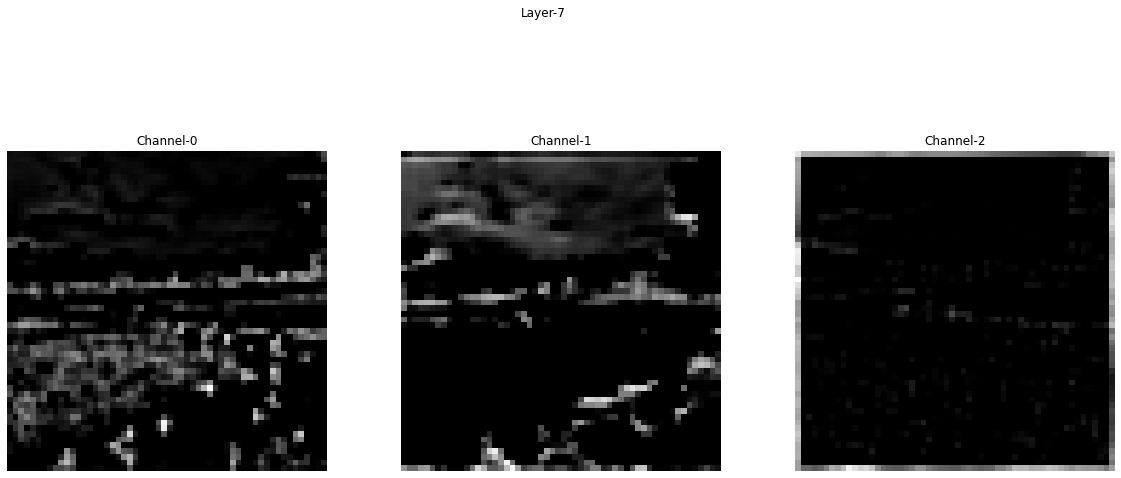

In [12]:
main(7)

## In layer 7 images are not understandable by human. Informations  are reduced. total 7 filters is used in single image to get layers 7 images.